In [1]:
import torch

# Defining a linear regression model

In [2]:
input_dim = 10
output_dim = 1
n_samples = 25

class LR(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LR, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

clf = LR(input_dim, output_dim)

# Creating a sample dataset

In [3]:
torch.random.manual_seed(42)

train_X = torch.randn((n_samples, input_dim))

train_y = torch.randn((n_samples, output_dim))
train_y = torch.where(train_y > 0, 1, 0).squeeze()


# Run the forward pass

In [4]:
n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()
    print(f" epoch: {i} | loss: {loss}")

 epoch: 0 | loss: 439.21649169921875
 epoch: 1 | loss: 439.21649169921875
 epoch: 2 | loss: 439.21649169921875
 epoch: 3 | loss: 439.21649169921875
 epoch: 4 | loss: 439.21649169921875
 epoch: 5 | loss: 439.21649169921875
 epoch: 6 | loss: 439.21649169921875
 epoch: 7 | loss: 439.21649169921875
 epoch: 8 | loss: 439.21649169921875
 epoch: 9 | loss: 439.21649169921875
 epoch: 10 | loss: 439.21649169921875
 epoch: 11 | loss: 439.21649169921875
 epoch: 12 | loss: 439.21649169921875
 epoch: 13 | loss: 439.21649169921875
 epoch: 14 | loss: 439.21649169921875
 epoch: 15 | loss: 439.21649169921875
 epoch: 16 | loss: 439.21649169921875
 epoch: 17 | loss: 439.21649169921875
 epoch: 18 | loss: 439.21649169921875
 epoch: 19 | loss: 439.21649169921875


For consistent printing of the metrics, let's add a bit of formatting.

In [5]:
n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()
    print(f" epoch: {i:3d} | loss: {loss: 3f}")

 epoch:   0 | loss:  439.216492
 epoch:   1 | loss:  439.216492
 epoch:   2 | loss:  439.216492
 epoch:   3 | loss:  439.216492
 epoch:   4 | loss:  439.216492
 epoch:   5 | loss:  439.216492
 epoch:   6 | loss:  439.216492
 epoch:   7 | loss:  439.216492
 epoch:   8 | loss:  439.216492
 epoch:   9 | loss:  439.216492
 epoch:  10 | loss:  439.216492
 epoch:  11 | loss:  439.216492
 epoch:  12 | loss:  439.216492
 epoch:  13 | loss:  439.216492
 epoch:  14 | loss:  439.216492
 epoch:  15 | loss:  439.216492
 epoch:  16 | loss:  439.216492
 epoch:  17 | loss:  439.216492
 epoch:  18 | loss:  439.216492
 epoch:  19 | loss:  439.216492


Great to see the consistent printing. Moving on..

We see that the loss is not decreasing. This is not surprising as we are not updating the weights of the model after the forward pass.

So, let's run the backward pass and update the model weights.

In [6]:
for param in clf.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0252, -0.1929,  0.2395, -0.1045, -0.1163, -0.0801, -0.2122,  0.0697,
         -0.2814,  0.0286]], requires_grad=True)
Parameter containing:
tensor([0.2818], requires_grad=True)


In [7]:
clf = LR(input_dim, output_dim)

torch.random.manual_seed(42)

train_X = torch.randn((n_samples, input_dim))

train_y = torch.randn((n_samples, output_dim))
train_y = torch.where(train_y > 0, 1, 0).squeeze()



n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()
    print(f" epoch: {i:3d} | loss: {loss: 3f}")

    # backward pass
    clf.backward(loss)

    # update the weights by a small amount
    for param in clf.parameters():
        param += 0.01 * param.grad

 epoch:   0 | loss:  468.883789


AttributeError: 'LR' object has no attribute 'backward'

The log shows that the backward pass is not defined for the LR class. Let's define it using PyTorch primitives for now.

In [8]:
class LR(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LR, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)
    
    def backward(self, loss):
        loss.backward()

In [9]:
torch.random.manual_seed(42)

train_X = torch.randn((n_samples, input_dim))

train_y = torch.randn((n_samples, output_dim))
train_y = torch.where(train_y > 0, 1, 0).squeeze()

clf = LR(input_dim, output_dim)


In [10]:
n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()
    print(f" epoch: {i:3d} | loss: {loss: 3f}")

    # backward pass
    clf.backward(loss)

    # update the weights by a small amount
    for param in clf.parameters():
        if param.grad is not None:
            # print(param.data, param.grad.data)
            param.data -= 0.01 * param.grad.data

 epoch:   0 | loss:  468.883789
 epoch:   1 | loss:  129594.320312
 epoch:   2 | loss:  77299416.000000
 epoch:   3 | loss:  58167160832.000000
 epoch:   4 | loss:  48056280023040.000000
 epoch:   5 | loss:  41152555564138496.000000
 epoch:   6 | loss:  35738083945556738048.000000
 epoch:   7 | loss:  31213512268582414712832.000000
 epoch:   8 | loss:  27327643083463872743473152.000000
 epoch:   9 | loss:  23950761379190263375112175616.000000
 epoch:  10 | loss:  21001019289346998297976096423936.000000
 epoch:  11 | loss:  18418480424700851905439886915665920.000000
 epoch:  12 | loss:  16155088832079382423743362260289978368.000000
 epoch:  13 | loss:  inf
 epoch:  14 | loss:  inf
 epoch:  15 | loss:  inf
 epoch:  16 | loss:  inf
 epoch:  17 | loss:  inf
 epoch:  18 | loss:  inf
 epoch:  19 | loss:  inf


The loss is growing in size and this might be because the param.data is growing in size.

Let's inspect this via a visualization where we are observing how the values of the param tensor are changing across epochs.

We could either take an average or we could take the magniture of the tensor. This latter is also called the norm.

We take this in each epoch and plot it to see how the values of the tensor are behaving!

In [11]:
torch.random.manual_seed(42)

train_X = torch.randn((n_samples, input_dim))

train_y = torch.randn((n_samples, output_dim))
train_y = torch.where(train_y > 0, 1, 0).squeeze()
clf = LR(input_dim, output_dim)

In [12]:
means = []
norms = []

n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()
    print(f" epoch: {i:3d} | loss: {loss: 3f}")

    # backward pass
    clf.backward(loss)

    # update the weights by a small amount
    for param in clf.parameters():
        if param.grad is not None:
            # print(param.data, param.grad.data)
            param.data -= 0.01 * param.grad.data

    all_params = torch.cat([p.data.view(-1) for p in clf.parameters()])
    means.append(torch.mean(all_params).item())
    norms.append(torch.norm(all_params).item())

 epoch:   0 | loss:  468.883789
 epoch:   1 | loss:  129594.320312
 epoch:   2 | loss:  77299416.000000
 epoch:   3 | loss:  58167160832.000000
 epoch:   4 | loss:  48056280023040.000000
 epoch:   5 | loss:  41152555564138496.000000
 epoch:   6 | loss:  35738083945556738048.000000
 epoch:   7 | loss:  31213512268582414712832.000000
 epoch:   8 | loss:  27327643083463872743473152.000000
 epoch:   9 | loss:  23950761379190263375112175616.000000
 epoch:  10 | loss:  21001019289346998297976096423936.000000
 epoch:  11 | loss:  18418480424700851905439886915665920.000000
 epoch:  12 | loss:  16155088832079382423743362260289978368.000000
 epoch:  13 | loss:  inf
 epoch:  14 | loss:  inf
 epoch:  15 | loss:  inf
 epoch:  16 | loss:  inf
 epoch:  17 | loss:  inf
 epoch:  18 | loss:  inf
 epoch:  19 | loss:  inf


In [13]:
means

[-0.5671924948692322,
 -0.06895793229341507,
 276.3551330566406,
 -12604.4033203125,
 449898.8125,
 -14719417.0,
 462224704.0,
 -14196027392.0,
 430340079616.0,
 -12940632653824.0,
 387139359473664.0,
 -1.1543208865562624e+16,
 3.434215992585093e+17,
 -1.020212320304051e+19,
 3.027792899323042e+20,
 -8.979954165845261e+21,
 2.6621218750150484e+23,
 -7.889519678226215e+24,
 2.3376752641896094e+26,
 -6.925601913143548e+27]

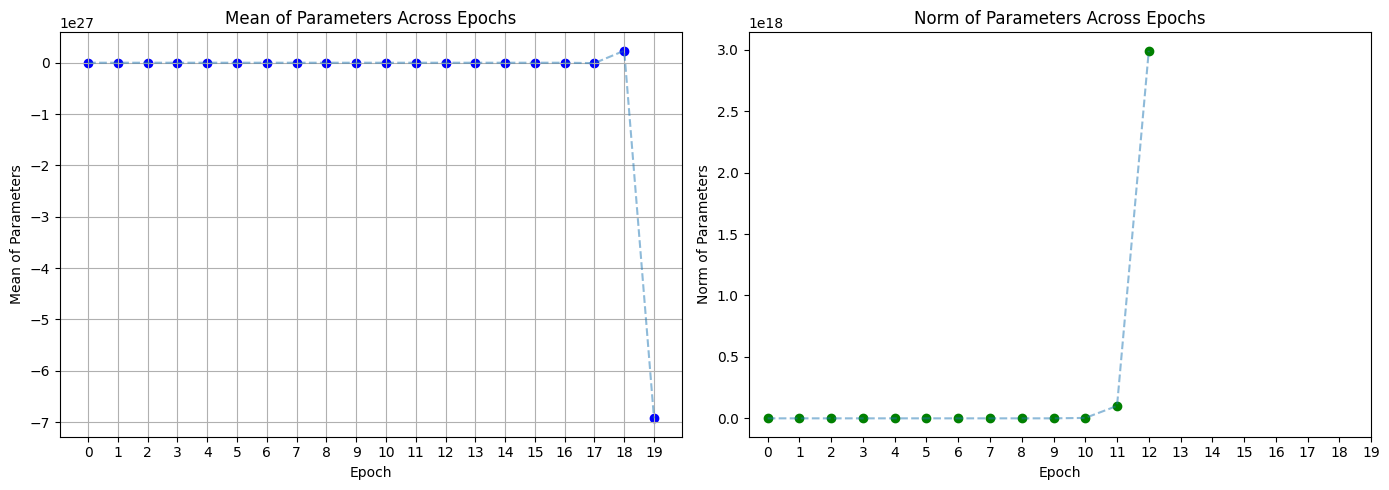

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

epochs = list(range(n_epochs))

# Plot means
axes[0].scatter(epochs, means, color='blue')
axes[0].plot(epochs, means, linestyle='dashed', alpha=0.5)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Mean of Parameters')
axes[0].set_title('Mean of Parameters Across Epochs')
axes[0].set_xticks(epochs)
axes[0].grid(True)

# Plot norms
axes[1].scatter(epochs, norms, color='green')
axes[1].plot(epochs, norms, linestyle='dashed', alpha=0.5)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Norm of Parameters')
axes[1].set_title('Norm of Parameters Across Epochs')
axes[1].set_xticks(epochs)

plt.tight_layout()
plt.show()

Converting the y-axis to log scale to spot the trend.

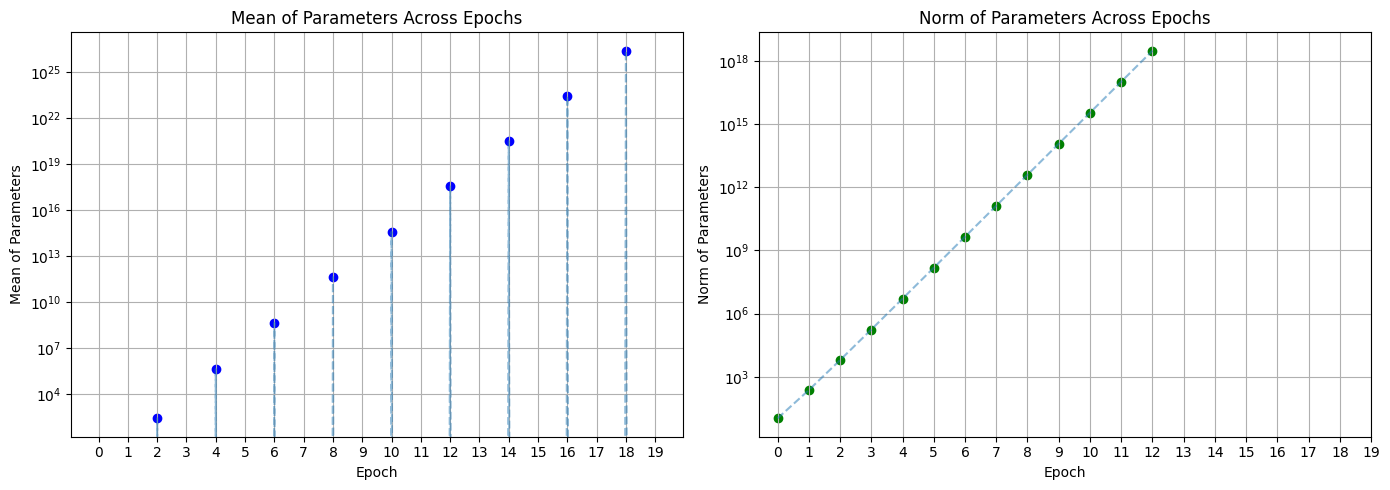

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot means
axes[0].scatter(epochs, means, color='blue')
axes[0].plot(epochs, means, linestyle='dashed', alpha=0.5)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Mean of Parameters')
axes[0].set_title('Mean of Parameters Across Epochs')
axes[0].set_xticks(epochs)
axes[0].set_yscale('log')  # Set y-axis to log scale
axes[0].grid(True)

# Plot norms
axes[1].scatter(epochs, norms, color='green')
axes[1].plot(epochs, norms, linestyle='dashed', alpha=0.5)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Norm of Parameters')
axes[1].set_title('Norm of Parameters Across Epochs')
axes[1].set_xticks(epochs)
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].grid(True)

plt.tight_layout()
plt.show()

Both the means and the norms are going up and this means that the weights are increasing in size and hence the loss is going high or exploding.

If the weights are exploding, let's look at the gradient values. Let's plot the gradient norm. I suspect the gradient norm is exploding and showing a spiky behavior.

In [16]:
torch.random.manual_seed(42)

train_X = torch.randn((n_samples, input_dim))

train_y = torch.randn((n_samples, output_dim))
train_y = torch.where(train_y > 0, 1, 0).squeeze()
clf = LR(input_dim, output_dim)

In [17]:
w_means = []
w_norms = []
g_means = []
g_norms = []

n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()
    print(f" epoch: {i:3d} | loss: {loss: 3f}")

    # backward pass
    clf.backward(loss)

    # update the weights by a small amount
    for param in clf.parameters():
        if param.grad is not None:
            param.data -= 0.01 * param.grad.data

    all_w_params = torch.cat([p.data.view(-1) for p in clf.parameters()])
    w_means.append(torch.mean(all_w_params).item())
    w_norms.append(torch.norm(all_w_params).item())

    all_grad_params = torch.cat([p.grad.data.view(-1) for p in clf.parameters()])
    g_means.append(torch.mean(all_grad_params).item())
    g_norms.append(torch.norm(all_grad_params).item())

 epoch:   0 | loss:  468.883789
 epoch:   1 | loss:  129594.320312
 epoch:   2 | loss:  77299416.000000
 epoch:   3 | loss:  58167160832.000000
 epoch:   4 | loss:  48056280023040.000000
 epoch:   5 | loss:  41152555564138496.000000
 epoch:   6 | loss:  35738083945556738048.000000
 epoch:   7 | loss:  31213512268582414712832.000000
 epoch:   8 | loss:  27327643083463872743473152.000000
 epoch:   9 | loss:  23950761379190263375112175616.000000
 epoch:  10 | loss:  21001019289346998297976096423936.000000
 epoch:  11 | loss:  18418480424700851905439886915665920.000000
 epoch:  12 | loss:  16155088832079382423743362260289978368.000000
 epoch:  13 | loss:  inf
 epoch:  14 | loss:  inf
 epoch:  15 | loss:  inf
 epoch:  16 | loss:  inf
 epoch:  17 | loss:  inf
 epoch:  18 | loss:  inf
 epoch:  19 | loss:  inf


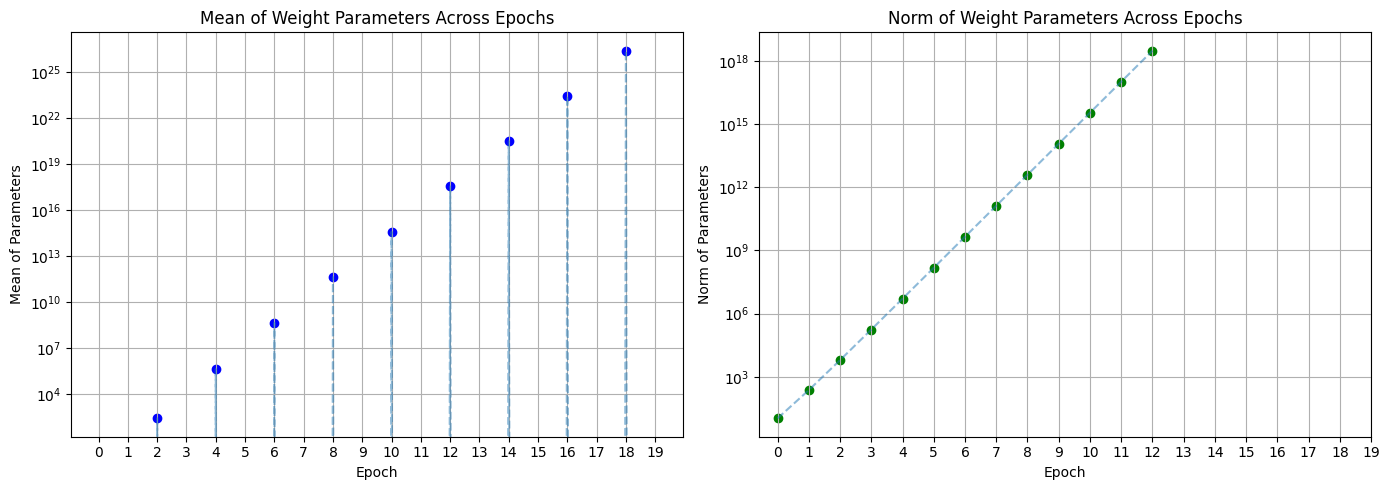

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

epochs = list(range(n_epochs))

# Plot means
axes[0].scatter(epochs, w_means, color='blue')
axes[0].plot(epochs, w_means, linestyle='dashed', alpha=0.5)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Mean of Parameters')
axes[0].set_title('Mean of Weight Parameters Across Epochs')
axes[0].set_xticks(epochs)
axes[0].set_yscale('log')  # Set y-axis to log scale
axes[0].grid(True)

# Plot norms
axes[1].scatter(epochs, w_norms, color='green')
axes[1].plot(epochs, w_norms, linestyle='dashed', alpha=0.5)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Norm of Parameters')
axes[1].set_title('Norm of Weight Parameters Across Epochs')
axes[1].set_xticks(epochs)
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].grid(True)

plt.tight_layout()
plt.show()

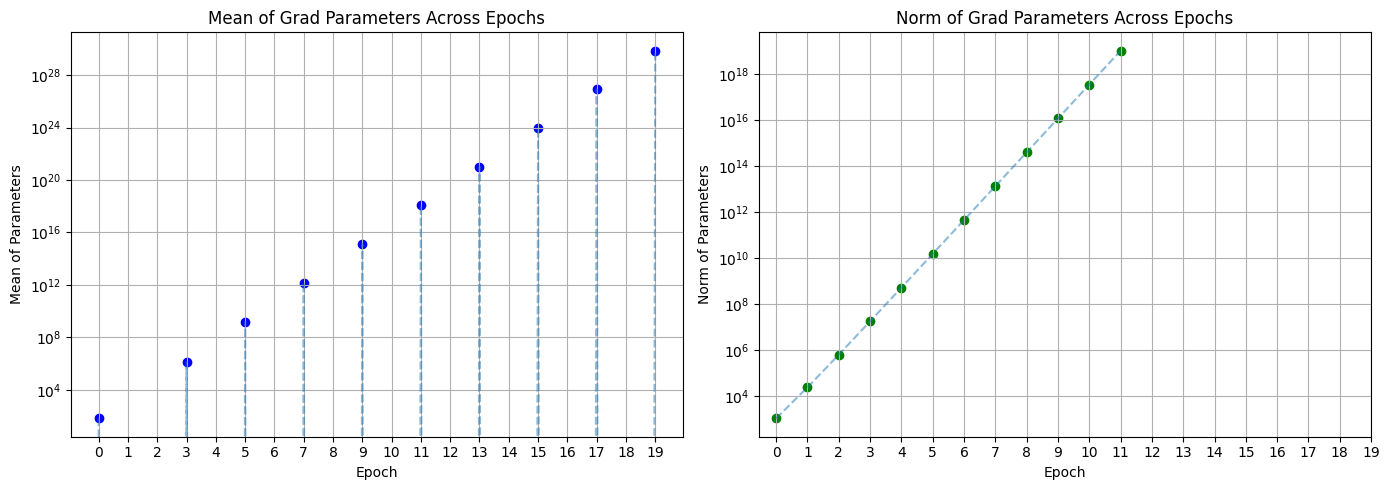

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

epochs = list(range(n_epochs))

# Plot means
axes[0].scatter(epochs, g_means, color='blue')
axes[0].plot(epochs, g_means, linestyle='dashed', alpha=0.5)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Mean of Parameters')
axes[0].set_title('Mean of Grad Parameters Across Epochs')
axes[0].set_xticks(epochs)
axes[0].set_yscale('log')  # Set y-axis to log scale
axes[0].grid(True)

# Plot norms
axes[1].scatter(epochs, g_norms, color='green')
axes[1].plot(epochs, g_norms, linestyle='dashed', alpha=0.5)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Norm of Parameters')
axes[1].set_title('Norm of Grad Parameters Across Epochs')
axes[1].set_xticks(epochs)
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].grid(True)

plt.tight_layout()
plt.show()

Gradient norms are also exploding as we suspected! This is a frequent cause of training instability.

The 3rd line is causing the instability.

```
for param in clf.parameters():
    if param.grad is not None:
        param.data -= 0.01 * param.grad.data
```

To reduce the instability, let's reduce the learning rate.

In [20]:
torch.random.manual_seed(42)

train_X = torch.randn((n_samples, input_dim))

train_y = torch.randn((n_samples, output_dim))
train_y = torch.where(train_y > 0, 1, 0).squeeze()
clf = LR(input_dim, output_dim)

In [21]:
w_means = []
w_norms = []
g_means = []
g_norms = []

n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()
    print(f" epoch: {i:3d} | loss: {loss: 3f}")

    # backward pass
    clf.backward(loss)

    # update the weights by a small amount
    for param in clf.parameters():
        if param.grad is not None:
            param.data -= 0.001 * param.grad.data

    all_w_params = torch.cat([p.data.view(-1) for p in clf.parameters()])
    w_means.append(torch.mean(all_w_params).item())
    w_norms.append(torch.norm(all_w_params).item())

    all_grad_params = torch.cat([p.grad.data.view(-1) for p in clf.parameters()])
    g_means.append(torch.mean(all_grad_params).item())
    g_norms.append(torch.norm(all_grad_params).item())

 epoch:   0 | loss:  468.883789
 epoch:   1 | loss:  643.423218
 epoch:   2 | loss:  592.325745
 epoch:   3 | loss:  337.138733
 epoch:   4 | loss:  668.062012
 epoch:   5 | loss:  623.533630
 epoch:   6 | loss:  390.863495
 epoch:   7 | loss:  512.101807
 epoch:   8 | loss:  757.173218
 epoch:   9 | loss:  376.562927
 epoch:  10 | loss:  473.086029
 epoch:  11 | loss:  730.655518
 epoch:  12 | loss:  459.003113
 epoch:  13 | loss:  444.271271
 epoch:  14 | loss:  626.661133
 epoch:  15 | loss:  645.793335
 epoch:  16 | loss:  319.846924
 epoch:  17 | loss:  639.863586
 epoch:  18 | loss:  628.888367
 epoch:  19 | loss:  454.609955


We see that the loss is not exploding now. However, it isn't going down each epoch. Let's further reduce the learning rate.

In [22]:
torch.random.manual_seed(42)

train_X = torch.randn((n_samples, input_dim))

train_y = torch.randn((n_samples, output_dim))
train_y = torch.where(train_y > 0, 1, 0).squeeze()
clf = LR(input_dim, output_dim)

In [23]:
w_means = []
w_norms = []
g_means = []
g_norms = []
losses  = []

n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()
    print(f" epoch: {i:3d} | loss: {loss: 3f}")

    # backward pass
    clf.backward(loss)

    # update the weights by a small amount
    for param in clf.parameters():
        if param.grad is not None:
            param.data -= 0.0001 * param.grad.data

    all_w_params = torch.cat([p.data.view(-1) for p in clf.parameters()])
    w_means.append(torch.mean(all_w_params).item())
    w_norms.append(torch.norm(all_w_params).item())

    all_grad_params = torch.cat([p.grad.data.view(-1) for p in clf.parameters()])
    g_means.append(torch.mean(all_grad_params).item())
    g_norms.append(torch.norm(all_grad_params).item())

    losses.append(loss.item())

 epoch:   0 | loss:  468.883789
 epoch:   1 | loss:  358.957642
 epoch:   2 | loss:  231.859085
 epoch:   3 | loss:  187.129211
 epoch:   4 | loss:  244.648773
 epoch:   5 | loss:  339.230316
 epoch:   6 | loss:  391.890991
 epoch:   7 | loss:  379.423248
 epoch:   8 | loss:  337.173798
 epoch:   9 | loss:  307.568481
 epoch:  10 | loss:  299.358063
 epoch:  11 | loss:  296.946564
 epoch:  12 | loss:  294.567902
 epoch:  13 | loss:  305.387146
 epoch:  14 | loss:  335.491272
 epoch:  15 | loss:  362.533234
 epoch:  16 | loss:  354.443726
 epoch:  17 | loss:  310.421387
 epoch:  18 | loss:  271.979004
 epoch:  19 | loss:  282.626556


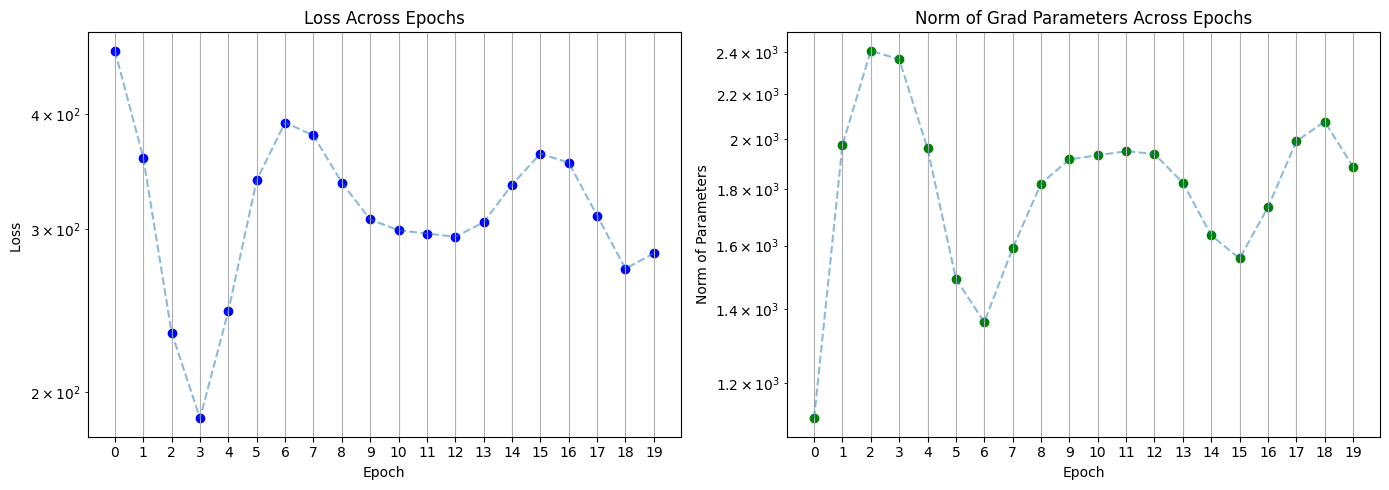

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

epochs = list(range(n_epochs))

# Plot means
axes[0].scatter(epochs, losses, color='blue')
axes[0].plot(epochs, losses, linestyle='dashed', alpha=0.5)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss ')
axes[0].set_title('Loss Across Epochs')
axes[0].set_xticks(epochs)
axes[0].set_yscale('log')  # Set y-axis to log scale
axes[0].grid(True)

# Plot norms
axes[1].scatter(epochs, g_norms, color='green')
axes[1].plot(epochs, g_norms, linestyle='dashed', alpha=0.5)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Norm of Parameters')
axes[1].set_title('Norm of Grad Parameters Across Epochs')
axes[1].set_xticks(epochs)
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].grid(True)

plt.tight_layout()
plt.show()

It's interesting to see that the loss and grad have a pretty strong negative correlation. Let's verify it.

In [25]:
def corr_torch(list_a, list_b):
    a = torch.tensor(list_a)
    b = torch.tensor(list_b)

    corr_matrix = torch.corrcoef(torch.stack([a, b]))
    corr_coef = corr_matrix[0, 1]
    return corr_coef.item()

corr_torch(g_norms, losses)

-0.9044728875160217

-0.9 is a strong correlation! :)